In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
# Ignore specific warning by category
warnings.filterwarnings("ignore")

print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
merged_df = pd.read_csv('task2.csv')

In [3]:
merged_df.head()

,Firms,NWP (£m),NWP (£m) .1,NWP (£m) .2,NWP (£m) .3,NWP (£m) .4,SCR (£m),SCR (£m).1,SCR (£m).2,SCR (£m).3,...,Gross expense ratio,Gross expense ratio.1,Gross expense ratio.2,Gross expense ratio.3,Gross expense ratio.4,Gross combined ratio,Gross combined ratio.1,Gross combined ratio.2,Gross combined ratio.3,Gross combined ratio.4
0,NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,...,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
1,Firm 1,-17754.10048645742,0,0,0,0,2021.3218622469626,6.9400432308232975e-09,0,0,...,0,77.25125440877,0,0,0,0,0.6750506932790861,0,0,0
2,Firm 2,9.244369313189408,0.09877074830183145,40.812426476455855,35.643070866752666,13.626145148362589,16.459756092235345,15.009073135423128,14.227214158173771,15.037066091884423,...,0.3911788022958701,0.6859407248997416,1.4332837556328637,0,0,1.7509462837935605,1.3215230065919024,1.545324743992064,0,0
3,Firm 3,0,0.8061303680871948,36.62019900755589,86.6300177587044,54.74418007968672,486.8877958868649,495.786299030199,626.6122173590844,81.24257946848688,...,0,0,0,0,0,0,0,0,0,0
4,Firm 4,19677.45335334369,41072.81615551643,20885.50644457689,14719.67291443594,49204.46513615872,15975.652771305251,15367.8870992743,10797.123318932956,22788.35946768266,...,0.23113940715745485,0.28547125355705194,0.05415039687690857,0.05184821153737166,-0.16288336913828425,1.047234208157352,0.4763843990933207,3.307378843478033,1.247403375411361,-2.303093034826068


In [4]:
merged_df.columns

Index(['Firms', 'NWP (£m) ', 'NWP (£m) .1', 'NWP (£m) .2', 'NWP (£m) .3',
       'NWP (£m) .4', 'SCR (£m)', 'SCR (£m).1', 'SCR (£m).2', 'SCR (£m).3',
       'SCR (£m).4', 'EoF for SCR (£m)', 'EoF for SCR (£m).1',
       'EoF for SCR (£m).2', 'EoF for SCR (£m).3', 'EoF for SCR (£m).4',
       'SCR coverage ratio', 'SCR coverage ratio.1', 'SCR coverage ratio.2',
       'SCR coverage ratio.3', 'SCR coverage ratio.4', 'GWP (£m)',
       'GWP (£m).1', 'GWP (£m).2', 'GWP (£m).3', 'GWP (£m).4',
       'Total assets (£m)', 'Total assets (£m).1', 'Total assets (£m).2',
       'Total assets (£m).3', 'Total assets (£m).4', 'Total liabilities (£m)',
       'Total liabilities (£m).1', 'Total liabilities (£m).2',
       'Total liabilities (£m).3', 'Total liabilities (£m).4',
       'Excess of assets over liabilities (£m) [= equity]',
       'Excess of assets over liabilities (£m) [= equity].1',
       'Excess of assets over liabilities (£m) [= equity].2',
       'Excess of assets over liabilities (£

In [5]:
# Standardize column names
merged_df.columns = merged_df.columns.str.rstrip()
merged_df.columns = merged_df.columns.str.replace(' ', '_', regex=True)
merged_df.columns = merged_df.columns.str.replace('(', '', regex=True)
merged_df.columns = merged_df.columns.str.replace(')', '', regex=True)
merged_df.columns = merged_df.columns.str.replace('.', '', regex=True)
merged_df.columns = merged_df.columns.str.replace('[', '', regex=True)
merged_df.columns = merged_df.columns.str.replace(']', '', regex=True)
merged_df.columns = merged_df.columns.str.replace(',', '', regex=True)
merged_df.columns = merged_df.columns.str.replace('=', '', regex=True)
merged_df.columns = merged_df.columns.str.replace('-', '_', regex=True)
merged_df.columns = merged_df.columns.str.replace('__', '_', regex=True)

In [6]:
merged_df.columns

Index(['Firms', 'NWP_£m', 'NWP_£m_1', 'NWP_£m_2', 'NWP_£m_3', 'NWP_£m_4',
       'SCR_£m', 'SCR_£m1', 'SCR_£m2', 'SCR_£m3', 'SCR_£m4', 'EoF_for_SCR_£m',
       'EoF_for_SCR_£m1', 'EoF_for_SCR_£m2', 'EoF_for_SCR_£m3',
       'EoF_for_SCR_£m4', 'SCR_coverage_ratio', 'SCR_coverage_ratio1',
       'SCR_coverage_ratio2', 'SCR_coverage_ratio3', 'SCR_coverage_ratio4',
       'GWP_£m', 'GWP_£m1', 'GWP_£m2', 'GWP_£m3', 'GWP_£m4', 'Total_assets_£m',
       'Total_assets_£m1', 'Total_assets_£m2', 'Total_assets_£m3',
       'Total_assets_£m4', 'Total_liabilities_£m', 'Total_liabilities_£m1',
       'Total_liabilities_£m2', 'Total_liabilities_£m3',
       'Total_liabilities_£m4', 'Excess_of_assets_over_liabilities_£m_equity',
       'Excess_of_assets_over_liabilities_£m_equity1',
       'Excess_of_assets_over_liabilities_£m_equity2',
       'Excess_of_assets_over_liabilities_£m_equity3',
       'Excess_of_assets_over_liabilities_£m_equity4',
       'Gross_claims_incurred_£m', 'Gross_claims_incurred

In [7]:
# Rename the columns for better clarity
merged_df = merged_df.rename(columns={
#     'Unnamed:_0': 'Firms',
    'NWP_£m': 'NWP_2016',
    'NWP_£m_1': 'NWP_2017',
    'NWP_£m_2': 'NWP_2018',
    'NWP_£m_3': 'NWP_2019',
    'NWP_£m_4': 'NWP_2020',
    'SCR_£m': 'SCR_2016',
    'SCR_£m1': 'SCR_2017',
    'SCR_£m2': 'SCR_2018',
    'SCR_£m3': 'SCR_2019',
    'SCR_£m4': 'SCR_2020',
    'EoF_for_SCR_£m': 'EoF_for_SCR_2016',
    'EoF_for_SCR_£m1': 'EoF_for_SCR_2017',
    'EoF_for_SCR_£m2': 'EoF_for_SCR_2018',
    'EoF_for_SCR_£m3': 'EoF_for_SCR_2019',
    'EoF_for_SCR_£m4': 'EoF_for_SCR_2020',
    'SCR_coverage_ratio': 'SCR_coverage_ratio_2016',
    'SCR_coverage_ratio1': 'SCR_coverage_ratio_2017',
    'SCR_coverage_ratio2': 'SCR_coverage_ratio_2018',
    'SCR_coverage_ratio3': 'SCR_coverage_ratio_2019',
    'SCR_coverage_ratio4': 'SCR_coverage_ratio_2020',
    'GWP_£m': 'GWP_2016',
    'GWP_£m1': 'GWP_2017',
    'GWP_£m2': 'GWP_2018',
    'GWP_£m3': 'GWP_2019',
    'GWP_£m4': 'GWP_2020',
    'Total_assets_£m': 'Total_assets_2016',
    'Total_assets_£m1': 'Total_assets_2017',
    'Total_assets_£m2': 'Total_assets_2018',
    'Total_assets_£m3': 'Total_assets_2019',
    'Total_assets_£m4': 'Total_assets_2020',
    'Total_liabilities_£m': 'Total_liabilities_2016',
    'Total_liabilities_£m1': 'Total_liabilities_2017',
    'Total_liabilities_£m2': 'Total_liabilities_2018',
    'Total_liabilities_£m3': 'Total_liabilities_2019',
    'Total_liabilities_£m4': 'Total_liabilities_2020',
    'Excess_of_assets_over_liabilities_£m_equity': 'Excess_of_assets_over_liabilities_2016',
    'Excess_of_assets_over_liabilities_£m_equity1': 'Excess_of_assets_over_liabilities_2017',
    'Excess_of_assets_over_liabilities_£m_equity2': 'Excess_of_assets_over_liabilities_2018',
    'Excess_of_assets_over_liabilities_£m_equity3': 'Excess_of_assets_over_liabilities_2019',
    'Excess_of_assets_over_liabilities_£m_equity4': 'Excess_of_assets_over_liabilities_2020',
    'Gross_claims_incurred_£m': 'Gross_claims_incurred_£m_2016',
    'Gross_claims_incurred_£m1': 'Gross_claims_incurred_£m_2017',
    'Gross_claims_incurred_£m2': 'Gross_claims_incurred_£m_2018',
    'Gross_claims_incurred_£m3': 'Gross_claims_incurred_£m_2019',
    'Gross_claims_incurred_£m4': 'Gross_claims_incurred_£m_2020',
    'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m': 'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m_2016',
    'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m1': 'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m_2017',
    'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m2': 'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m_2018',
    'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m3': 'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m_2019',
    'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m4': 'Gross_BEL_inc_TPs_as_whole_pre_TMTP_£m_2020',
    'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m': 'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m_2016',
    'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m1': 'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m_2017',
    'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m2': 'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m_2018',
    'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m3': 'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m_2019',
    'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m4': 'Net_BEL_inc_TPs_as_a_whole_pre_TMTP_£m_2020',
    'Pure_net_claims_ratio': 'Pure_net_claims_ratio_2016',
    'Pure_net_claims_ratio1': 'Pure_net_claims_ratio_2017',
    'Pure_net_claims_ratio2': 'Pure_net_claims_ratio_2018',
    'Pure_net_claims_ratio3': 'Pure_net_claims_ratio_2019',
    'Pure_net_claims_ratio4': 'Pure_net_claims_ratio_2020',
    'Net_expense_ratio': 'Net_expense_ratio_2016',
    'Net_expense_ratio1': 'Net_expense_ratio_2017',
    'Net_expense_ratio2': 'Net_expense_ratio_2018',
    'Net_expense_ratio3': 'Net_expense_ratio_2019',
    'Net_expense_ratio4': 'Net_expense_ratio_2020',
    'Net_combined_ratio': 'Net_combined_ratio_2016',
    'Net_combined_ratio1': 'Net_combined_ratio_2017',
    'Net_combined_ratio2': 'Net_combined_ratio_2018',
    'Net_combined_ratio3': 'Net_combined_ratio_2019',
    'Net_combined_ratio4': 'Net_combined_ratio_2020',
    'Pure_gross_claims_ratio': 'Pure_gross_claims_ratio_2016',
    'Pure_gross_claims_ratio1': 'Pure_gross_claims_ratio_2017',
    'Pure_gross_claims_ratio2': 'Pure_gross_claims_ratio_2018',
    'Pure_gross_claims_ratio3': 'Pure_gross_claims_ratio_2019',
    'Pure_gross_claims_ratio4': 'Pure_gross_claims_ratio_2020',
    'Gross_expense_ratio': 'Gross_expense_ratio_2016',
    'Gross_expense_ratio1': 'Gross_expense_ratio_2017',
    'Gross_expense_ratio2': 'Gross_expense_ratio_2018',
    'Gross_expense_ratio3': 'Gross_expense_ratio_2019',
    'Gross_expense_ratio4': 'Gross_expense_ratio_2020',
    'Gross_combined_ratio': 'Gross_combined_ratio_2016',
    'Gross_combined_ratio1': 'Gross_combined_ratio_2017',
    'Gross_combined_ratio2': 'Gross_combined_ratio_2018',
    'Gross_combined_ratio3': 'Gross_combined_ratio_2019',
    'Gross_combined_ratio4': 'Gross_combined_ratio_2020',
})


In [8]:
merged_df.head()

,Firms,NWP_2016,NWP_2017,NWP_2018,NWP_2019,NWP_2020,SCR_2016,SCR_2017,SCR_2018,SCR_2019,...,Gross_expense_ratio_2016,Gross_expense_ratio_2017,Gross_expense_ratio_2018,Gross_expense_ratio_2019,Gross_expense_ratio_2020,Gross_combined_ratio_2016,Gross_combined_ratio_2017,Gross_combined_ratio_2018,Gross_combined_ratio_2019,Gross_combined_ratio_2020
0,NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,...,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
1,Firm 1,-17754.10048645742,0,0,0,0,2021.3218622469626,6.9400432308232975e-09,0,0,...,0,77.25125440877,0,0,0,0,0.6750506932790861,0,0,0
2,Firm 2,9.244369313189408,0.09877074830183145,40.812426476455855,35.643070866752666,13.626145148362589,16.459756092235345,15.009073135423128,14.227214158173771,15.037066091884423,...,0.3911788022958701,0.6859407248997416,1.4332837556328637,0,0,1.7509462837935605,1.3215230065919024,1.545324743992064,0,0
3,Firm 3,0,0.8061303680871948,36.62019900755589,86.6300177587044,54.74418007968672,486.8877958868649,495.786299030199,626.6122173590844,81.24257946848688,...,0,0,0,0,0,0,0,0,0,0
4,Firm 4,19677.45335334369,41072.81615551643,20885.50644457689,14719.67291443594,49204.46513615872,15975.652771305251,15367.8870992743,10797.123318932956,22788.35946768266,...,0.23113940715745485,0.28547125355705194,0.05415039687690857,0.05184821153737166,-0.16288336913828425,1.047234208157352,0.4763843990933207,3.307378843478033,1.247403375411361,-2.303093034826068


In [9]:
merged_df.columns

Index(['Firms', 'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
       'SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020',
       'EoF_for_SCR_2016', 'EoF_for_SCR_2017', 'EoF_for_SCR_2018',
       'EoF_for_SCR_2019', 'EoF_for_SCR_2020', 'SCR_coverage_ratio_2016',
       'SCR_coverage_ratio_2017', 'SCR_coverage_ratio_2018',
       'SCR_coverage_ratio_2019', 'SCR_coverage_ratio_2020', 'GWP_2016',
       'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020', 'Total_assets_2016',
       'Total_assets_2017', 'Total_assets_2018', 'Total_assets_2019',
       'Total_assets_2020', 'Total_liabilities_2016', 'Total_liabilities_2017',
       'Total_liabilities_2018', 'Total_liabilities_2019',
       'Total_liabilities_2020', 'Excess_of_assets_over_liabilities_2016',
       'Excess_of_assets_over_liabilities_2017',
       'Excess_of_assets_over_liabilities_2018',
       'Excess_of_assets_over_liabilities_2019',
       'Excess_of_assets_over_liabilities_2020',
       'Gross_claims_incur

In [10]:
merged_df = merged_df.drop(merged_df.index[0])

In [11]:
merged_df.head()

,Firms,NWP_2016,NWP_2017,NWP_2018,NWP_2019,NWP_2020,SCR_2016,SCR_2017,SCR_2018,SCR_2019,...,Gross_expense_ratio_2016,Gross_expense_ratio_2017,Gross_expense_ratio_2018,Gross_expense_ratio_2019,Gross_expense_ratio_2020,Gross_combined_ratio_2016,Gross_combined_ratio_2017,Gross_combined_ratio_2018,Gross_combined_ratio_2019,Gross_combined_ratio_2020
1,Firm 1,-17754.10048645742,0,0,0,0,2021.3218622469626,6.9400432308232975e-09,0,0,...,0,77.25125440877,0,0,0,0,0.6750506932790861,0,0,0
2,Firm 2,9.244369313189408,0.09877074830183145,40.812426476455855,35.643070866752666,13.626145148362589,16.459756092235345,15.009073135423128,14.227214158173771,15.037066091884423,...,0.3911788022958701,0.6859407248997416,1.4332837556328637,0,0,1.7509462837935605,1.3215230065919024,1.545324743992064,0,0
3,Firm 3,0,0.8061303680871948,36.62019900755589,86.6300177587044,54.74418007968672,486.8877958868649,495.786299030199,626.6122173590844,81.24257946848688,...,0,0,0,0,0,0,0,0,0,0
4,Firm 4,19677.45335334369,41072.81615551643,20885.50644457689,14719.67291443594,49204.46513615872,15975.652771305251,15367.8870992743,10797.123318932956,22788.35946768266,...,0.23113940715745485,0.28547125355705194,0.05415039687690857,0.05184821153737166,-0.16288336913828425,1.047234208157352,0.4763843990933207,3.307378843478033,1.247403375411361,-2.303093034826068
5,Firm 5,128.8122075540615,10.407370936655743,79.57966325390584,79.42362322335269,61.72729473804931,32.742278982636215,43.95403924735113,31.622572008379212,30.119284531868587,...,0.23612842626376865,0.23272486667668435,0.20450778125546212,0.1317385125109131,0.04870298975762643,0.2436114285756736,1.977732028688713,2.4952872245970488,0.36545511276677267,1.133645348089864


In [12]:
merged_df['idx'] = merged_df['Firms']

In [13]:
merged_df.set_index('idx', inplace=True)

In [14]:
merged_df.head()

,Firms,NWP_2016,NWP_2017,NWP_2018,NWP_2019,NWP_2020,SCR_2016,SCR_2017,SCR_2018,SCR_2019,...,Gross_expense_ratio_2016,Gross_expense_ratio_2017,Gross_expense_ratio_2018,Gross_expense_ratio_2019,Gross_expense_ratio_2020,Gross_combined_ratio_2016,Gross_combined_ratio_2017,Gross_combined_ratio_2018,Gross_combined_ratio_2019,Gross_combined_ratio_2020
idx,,,,,,,,,,,,,,,,,,,,,
Firm 1,Firm 1,-17754.10048645742,0,0,0,0,2021.3218622469626,6.9400432308232975e-09,0,0,...,0,77.25125440877,0,0,0,0,0.6750506932790861,0,0,0
Firm 2,Firm 2,9.244369313189408,0.09877074830183145,40.812426476455855,35.643070866752666,13.626145148362589,16.459756092235345,15.009073135423128,14.227214158173771,15.037066091884423,...,0.3911788022958701,0.6859407248997416,1.4332837556328637,0,0,1.7509462837935605,1.3215230065919024,1.545324743992064,0,0
Firm 3,Firm 3,0,0.8061303680871948,36.62019900755589,86.6300177587044,54.74418007968672,486.8877958868649,495.786299030199,626.6122173590844,81.24257946848688,...,0,0,0,0,0,0,0,0,0,0
Firm 4,Firm 4,19677.45335334369,41072.81615551643,20885.50644457689,14719.67291443594,49204.46513615872,15975.652771305251,15367.8870992743,10797.123318932956,22788.35946768266,...,0.23113940715745485,0.28547125355705194,0.05415039687690857,0.05184821153737166,-0.16288336913828425,1.047234208157352,0.4763843990933207,3.307378843478033,1.247403375411361,-2.303093034826068
Firm 5,Firm 5,128.8122075540615,10.407370936655743,79.57966325390584,79.42362322335269,61.72729473804931,32.742278982636215,43.95403924735113,31.622572008379212,30.119284531868587,...,0.23612842626376865,0.23272486667668435,0.20450778125546212,0.1317385125109131,0.04870298975762643,0.2436114285756736,1.977732028688713,2.4952872245970488,0.36545511276677267,1.133645348089864


idx
Firm 1      0
Firm 205    0
Firm 223    0
Firm 222    0
Firm 221    0
Firm 220    0
Firm 219    0
Firm 218    0
Firm 217    0
Firm 216    0
dtype: int64


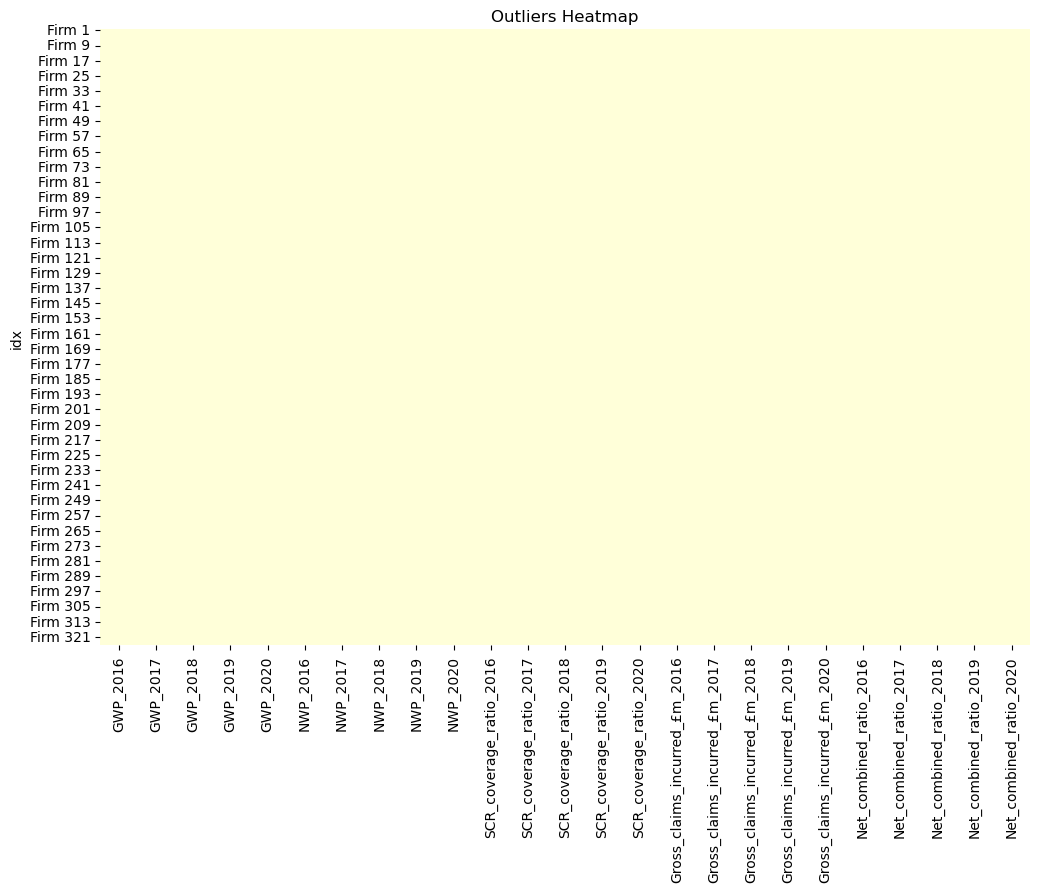

In [15]:
# Selecting relevant columns
selected_cols = ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020',
                 'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
                 'SCR_coverage_ratio_2016', 'SCR_coverage_ratio_2017', 'SCR_coverage_ratio_2018',
                 'SCR_coverage_ratio_2019', 'SCR_coverage_ratio_2020',
                 'Gross_claims_incurred_£m_2016', 'Gross_claims_incurred_£m_2017',
                 'Gross_claims_incurred_£m_2018', 'Gross_claims_incurred_£m_2019',
                 'Gross_claims_incurred_£m_2020', 'Net_combined_ratio_2016',
                 'Net_combined_ratio_2017', 'Net_combined_ratio_2018', 'Net_combined_ratio_2019',
                 'Net_combined_ratio_2020']

# Filtering the DataFrame
selected_data = merged_df[selected_cols]

# Identifying outliers using z-scores
z_scores = (selected_data - selected_data.mean()) / selected_data.std()

# Considering z-score threshold to identify outliers
outliers = (z_scores > 2.0) | (z_scores < -2.0)

# Counting number of outliers for each firm
outliers_count = outliers.sum(axis=1)

# Sorting firms by the number of outliers
sorted_firms = outliers_count.sort_values(ascending=False)

# Displaying top 10 firms with the most outliers
top_firms = sorted_firms.head(10)
print(top_firms)

# Creating a heatmap to visualize outliers
plt.figure(figsize=(12, 8))
sns.heatmap(outliers, cmap="YlGnBu", cbar=False)
plt.title("Outliers Heatmap")
plt.show()


idx
Firm 1      0
Firm 205    0
Firm 223    0
Firm 222    0
Firm 221    0
Firm 220    0
Firm 219    0
Firm 218    0
Firm 217    0
Firm 216    0
dtype: int64


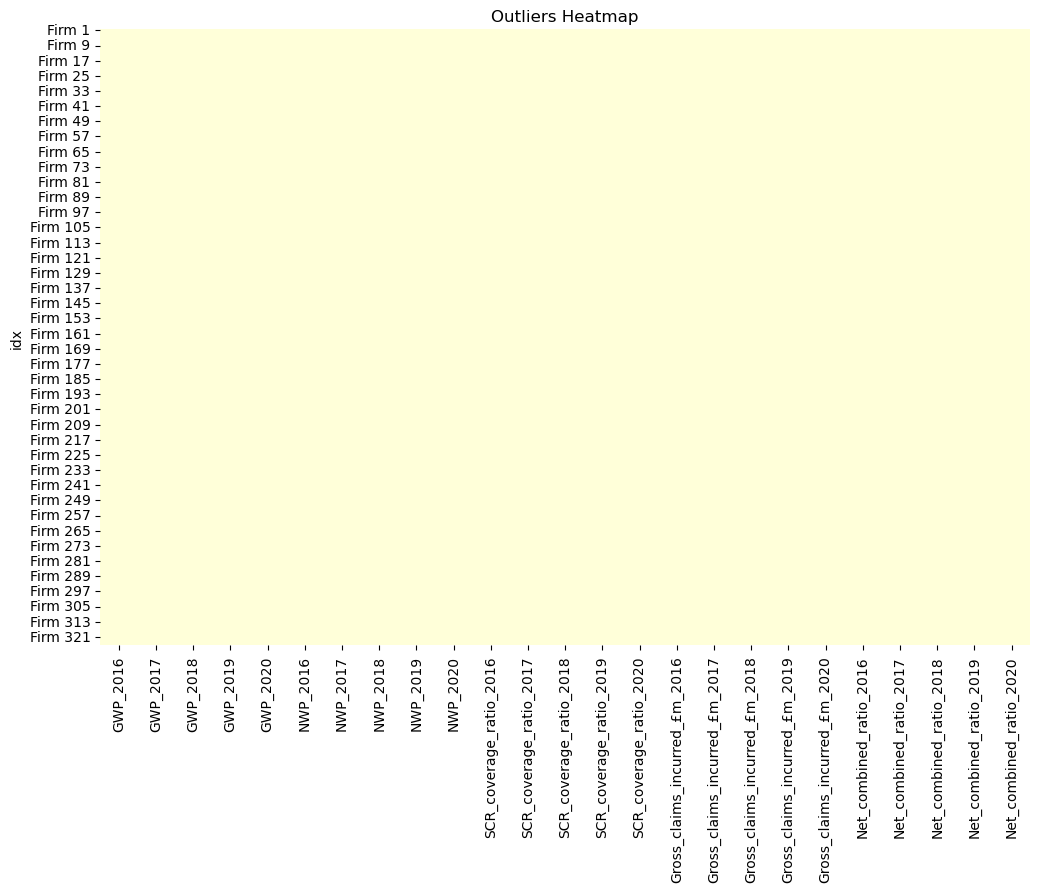

In [16]:
# Filtering the DataFrame
selected_data = merged_df[selected_cols]

# Calculate the IQR for each column
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers = (selected_data < (Q1 - 1.5 * IQR)) | (selected_data > (Q3 + 1.5 * IQR))

# Counting number of outliers for each firm
outliers_count = outliers.sum(axis=1)

# Sorting firms by the number of outliers
sorted_firms = outliers_count.sort_values(ascending=False)

# Displaying top 10 firms with the most outliers
top_firms = sorted_firms.head(10)
print(top_firms)

# Creating a heatmap to visualize outliers
plt.figure(figsize=(12, 8))
sns.heatmap(outliers, cmap="YlGnBu", cbar=False)
plt.title("Outliers Heatmap")
plt.show()

In [17]:
# Convert the 'GWP_2016' column to numeric
merged_df['GWP_2016'] = pd.to_numeric(merged_df['GWP_2016'], errors='coerce')

# GWP Outliers for the year 2016
Q1 = merged_df['GWP_2016'].quantile(0.25)
Q3 = merged_df['GWP_2016'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = merged_df[(merged_df['GWP_2016'] < (Q1 - 1.5 * IQR)) | (merged_df['GWP_2016'] > (Q3 + 1.5 * IQR))]

# Print or display the top 5 outliers
print(outliers['GWP_2016'].sort_values(ascending=False)[:5])


idx
Firm 4      43375.806960
Firm 105    29995.224155
Firm 210    18971.286047
Firm 26     17208.386183
Firm 151    12222.424866
Name: GWP_2016, dtype: float64


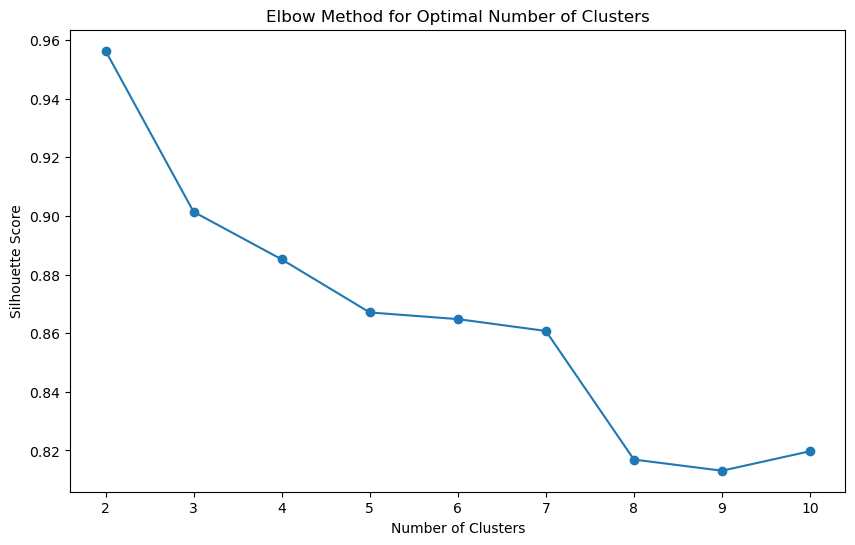

In [18]:
# Selecting relevant columns for clustering (NWP and GWP changes)
data_for_clustering = merged_df[['Firms', 'GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020', 
                                'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020']]

# Dropping rows with NaN values (replace with appropriate handling if needed)
data_for_clustering = data_for_clustering.dropna()

# Extracting firm names for later reference
firms = data_for_clustering['Firms']

# Selecting only NWP and GWP change columns for clustering
X = data_for_clustering.iloc[:, 1:]

# Standardizing the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of clusters to try
cluster_range = range(2, 11)  # You can adjust the range based on your preferences

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Perform K-Means clustering for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

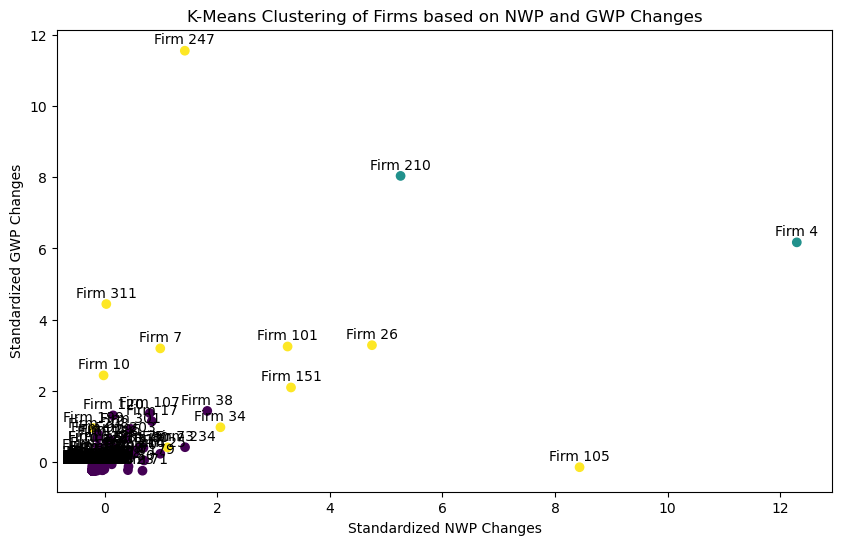

In [19]:

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3)  # You can choose the number of clusters
data_for_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_for_clustering['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Firms based on NWP and GWP Changes')
plt.xlabel('Standardized NWP Changes')
plt.ylabel('Standardized GWP Changes')

# Annotating each point with the firm name
for i, firm in enumerate(firms):
    plt.annotate(firm, (X_scaled[i, 0], X_scaled[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

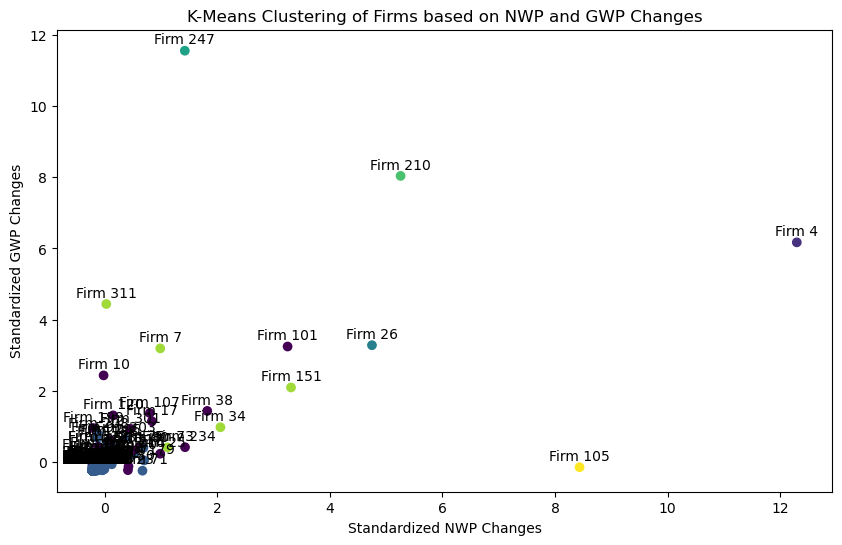

In [20]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=8)  # You can choose the number of clusters
data_for_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_for_clustering['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Firms based on NWP and GWP Changes')
plt.xlabel('Standardized NWP Changes')
plt.ylabel('Standardized GWP Changes')

# Annotating each point with the firm name
for i, firm in enumerate(firms):
    plt.annotate(firm, (X_scaled[i, 0], X_scaled[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()